In [5]:
import sys
import os

# Get the project root (one level up from the current directory)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add the project root to Python's search path
sys.path.append(project_root)


In [20]:
# importing preliminaries

from src.preprocessing import *
from src.clustering import *
from src.visualization import *
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
# importing dataset

file_path = "../data/raw/Mall_Customers.csv"

df = load_data(file_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
df.shape

(200, 5)

In [29]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [34]:
df.duplicated().sum()

0

In [31]:
df.describe().round(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [9]:
# checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
new_names = {
    'Annual Income (k$)' : 'annual_income',
    'Spending Score (1-100)' : 'spending_score',
    'Gender' : 'gender'
}

df.rename(columns=new_names, inplace=True)

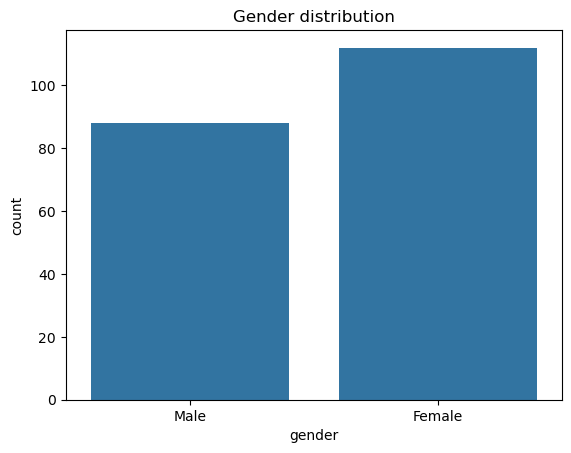

In [43]:
# checking the Gender distribution

sns.countplot(x='gender', data=df)
plt.title('Gender distribution')
plt.show()

In [44]:
# number distribution

gender_counts = df['gender'].value_counts()
gender_counts

gender
Female    112
Male       88
Name: count, dtype: int64

There are more females (112 females) than male (88 Male)

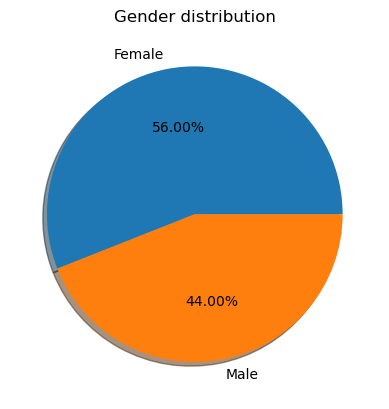

In [47]:
gender_counts.plot(kind='pie', autopct='%1.2f%%', shadow = True)
plt.title('Gender distribution')
plt.ylabel('')
plt.show()

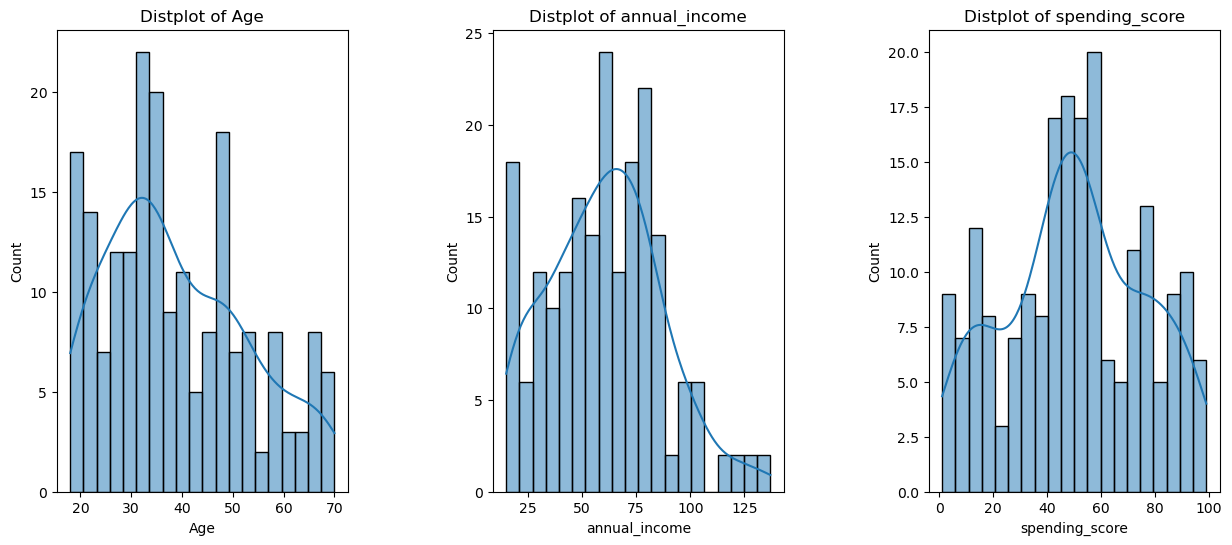

In [52]:
# Set up the figure
plt.figure(1, figsize=(15, 6))

n = 0
for x in ['Age', 'annual_income', 'spending_score']:
    n += 1
    plt.subplot(1, 3, n)
    sns.histplot(df[x], bins=20, kde=True)  # Replaced distplot with histplot
    plt.title(f'Distplot of {x}')  # f-string for better readability

# Adjust subplots outside the loop
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show the plot
plt.show()


In [55]:
# Calculate other statistics (e.g., median, std)
summary_stats_by_gender = df.groupby('gender')['annual_income'].describe()
print(summary_stats_by_gender)


        count       mean        std   min    25%   50%    75%    max
gender                                                              
Female  112.0  59.250000  26.011952  16.0  39.75  60.0  77.25  126.0
Male     88.0  62.227273  26.638373  15.0  45.50  62.5  78.00  137.0


From the stats, we are a higher annual income from the Male gender 

In [57]:
# summary stats of gender by spending_score

gender_by_spending = df.groupby('gender')['spending_score'].describe()
print(gender_by_spending)

        count       mean       std  min   25%   50%   75%   max
gender                                                         
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0


We can also denote from here that the female gender tends to spend more than the male gender

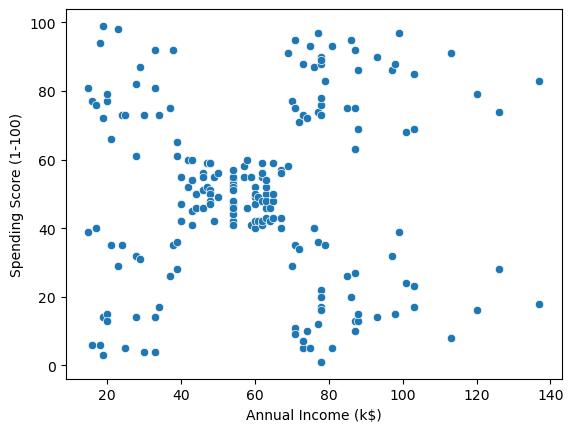

In [ ]:

sns.scatterplot(data=df, x='annual_income', y="spending_score")
plt.show()

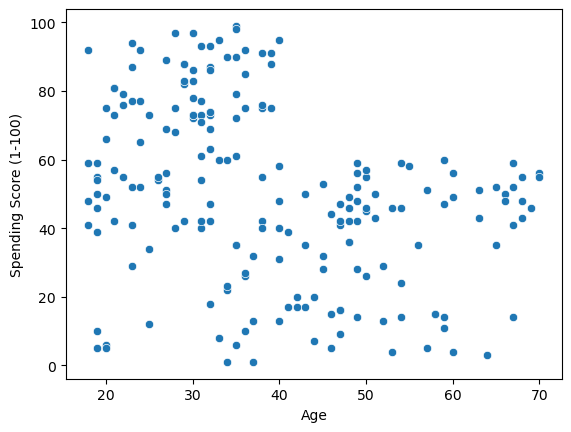

In [12]:
# checking relationship between age and spending score

sns.scatterplot(data=df, x='Age', y="Spending Score (1-100)")
plt.show()

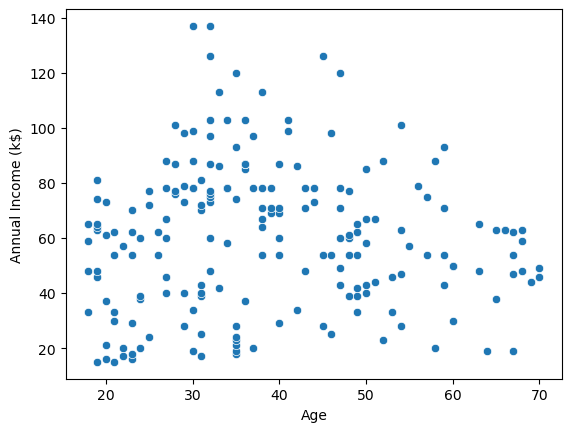

In [13]:
# check relationship between age and annualincome

sns.scatterplot(data=df, x='Age', y='Annual Income (k$)')
plt.show()

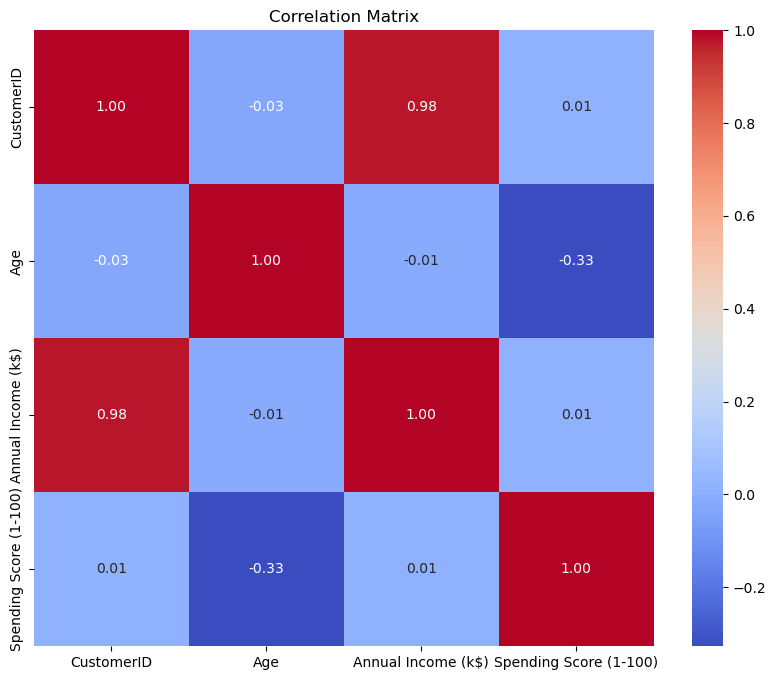

In [21]:
# check for correlation between numerical features

# selecting numerical values
df_num = df.select_dtypes(include=['int'])

corr = df_num.corr() # computing correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



c:\Users\DELL\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans 

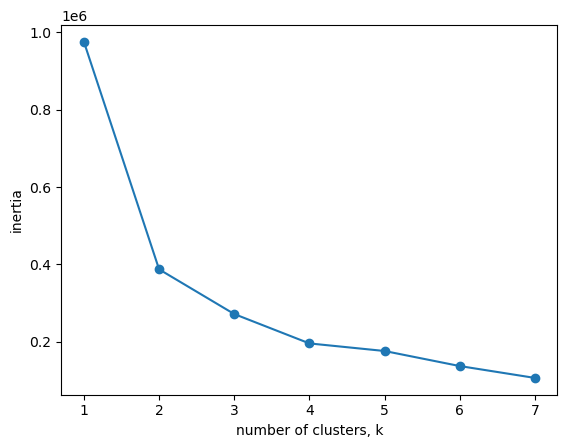

In [73]:
# visualise the needed number of clusters

ks = range(1, 8)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_num)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [75]:
!pip install -q yellowbrick

c:\Users\DELL\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans 

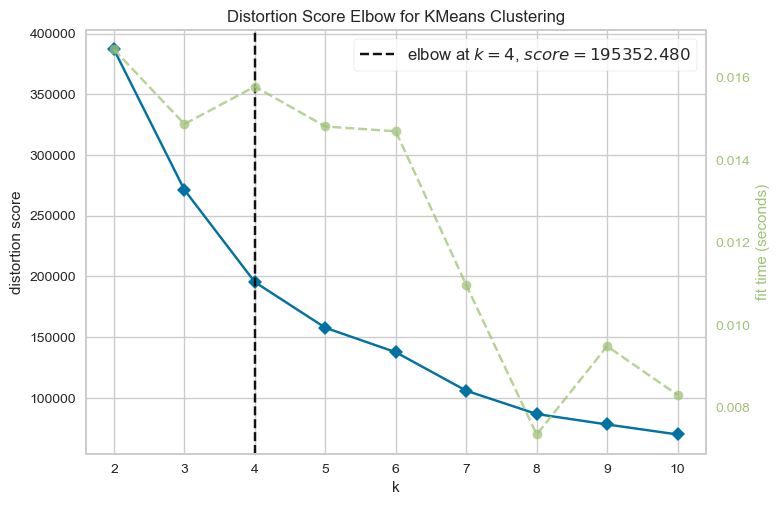

In [79]:
# using KElbow Visualizer
from yellowbrick.cluster import KElbowVisualizer


model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(df_num)
visualizer.show()
plt.show()

c:\Users\DELL\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
0   96.985915  43.197183           59.352113               50.591549
1  166.500000  36.044118           88.911765               50.205882
2   31.016393  36.918033           30.360656               49.737705


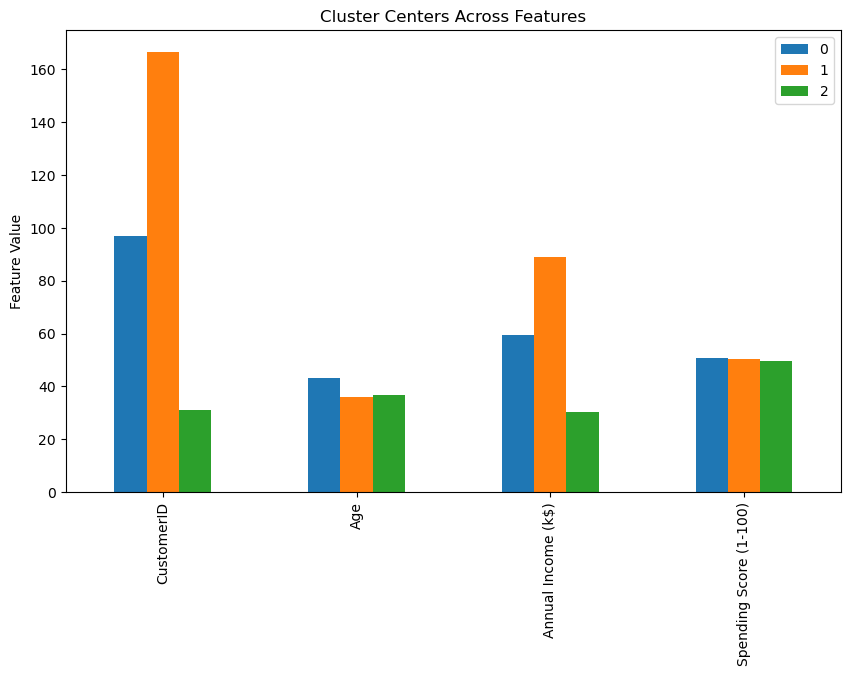

In [59]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_num)

# Create a DataFrame to analyze cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_num.columns)
print(cluster_centers)

# Visualize the centers
cluster_centers.T.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Centers Across Features')
plt.ylabel('Feature Value')
plt.show()


In [70]:
# saving csv
file = "../data/processed/processed_data.csv"
df.to_csv(file, index=False)